# Basic RNN
- Objective: to understand basics of RNN & LSTM

## Recurrent Neural Networks
- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward


<br>
- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence
</br>

<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>
<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

## Load Dataset

In [80]:
import numpy as np

from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [89]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [90]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

In [91]:
X_train.shape

(1395,)

In [93]:
X_train[1]

[1, 486, 341, 785, 26, 14, 482, 26, 255, 606, 252, 83, 146, 91, 102, 17, 12]

In [94]:
y_train

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [95]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  6,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19,
       20, 21, 23, 24, 25, 28, 30, 32, 34, 36, 37, 38, 39, 45],
      dtype=int64)

In [96]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 16, 17, 18, 19, 20,
       23, 24, 25, 26, 32, 40, 42], dtype=int64)

In [97]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [98]:
X_train[0]

array([   1,  245,  273,  207,  156,   53,   74,  160,   26,   14,   46,
        296,   26,   39,   74, 2979, 3554,   14,   46, 4689, 4329,   86,
         61, 3499, 4795,   14,   61,  451, 4329,   17,   12,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0])

In [99]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [100]:
y_data = np.concatenate((y_train, y_test))
y_data = to_categorical(y_data)

In [101]:
y_train = y_data[:1395]
y_test = y_data[1395:]

In [102]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


## 1. Vanilla RNN
- Vanilla RNNs have a simple structure
- However, they suffer from the problem of "long-term dependencies"
- Hence, they are not able to keep the **sequential memory" for long

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 600px"/>

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Activation
from tensorflow.keras import optimizers


In [104]:
def vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [106]:
#model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)
model = vanilla_rnn()

In [107]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs = 200, batch_size = 50, verbose = 1)

Epoch 1/200
23/23 [==============================] - 2s 28ms/step - loss: 3.2470 - accuracy: 0.4489 - val_loss: 2.2806 - val_accuracy: 0.6918
Epoch 2/200
23/23 [==============================] - 0s 14ms/step - loss: 1.8041 - accuracy: 0.6837 - val_loss: 1.4463 - val_accuracy: 0.7240
Epoch 3/200
23/23 [==============================] - 0s 14ms/step - loss: 1.3737 - accuracy: 0.7124 - val_loss: 1.2085 - val_accuracy: 0.7240
Epoch 4/200
23/23 [==============================] - 0s 14ms/step - loss: 1.2350 - accuracy: 0.7124 - val_loss: 1.1388 - val_accuracy: 0.7240
Epoch 5/200
23/23 [==============================] - 0s 14ms/step - loss: 1.1994 - accuracy: 0.7124 - val_loss: 1.1194 - val_accuracy: 0.7240
Epoch 6/200
23/23 [==============================] - 0s 14ms/step - loss: 1.1858 - accuracy: 0.7124 - val_loss: 1.1134 - val_accuracy: 0.7240
Epoch 7/200
23/23 [==============================] - 0s 14ms/step - loss: 1.1800 - accuracy: 0.7124 - val_loss: 1.1105 - val_accuracy: 0.7240
Epoch 

23/23 [==============================] - 0s 14ms/step - loss: 1.0240 - accuracy: 0.7312 - val_loss: 1.0248 - val_accuracy: 0.7312
Epoch 59/200
23/23 [==============================] - 0s 14ms/step - loss: 1.0114 - accuracy: 0.7258 - val_loss: 1.0240 - val_accuracy: 0.7312
Epoch 60/200
23/23 [==============================] - 0s 13ms/step - loss: 1.0698 - accuracy: 0.6900 - val_loss: 1.2474 - val_accuracy: 0.7097
Epoch 61/200
23/23 [==============================] - 0s 15ms/step - loss: 1.1075 - accuracy: 0.7177 - val_loss: 1.0663 - val_accuracy: 0.7276
Epoch 62/200
23/23 [==============================] - 0s 14ms/step - loss: 1.0446 - accuracy: 0.7195 - val_loss: 1.0304 - val_accuracy: 0.7276
Epoch 63/200
23/23 [==============================] - 0s 13ms/step - loss: 1.0081 - accuracy: 0.7240 - val_loss: 1.0217 - val_accuracy: 0.7384
Epoch 64/200
23/23 [==============================] - 0s 14ms/step - loss: 1.0277 - accuracy: 0.7177 - val_loss: 1.0244 - val_accuracy: 0.7348
Epoch 65/200

23/23 [==============================] - 0s 13ms/step - loss: 0.8858 - accuracy: 0.7384 - val_loss: 0.9956 - val_accuracy: 0.7419
Epoch 116/200
23/23 [==============================] - 0s 13ms/step - loss: 0.8647 - accuracy: 0.7455 - val_loss: 0.9843 - val_accuracy: 0.7455
Epoch 117/200
23/23 [==============================] - 0s 13ms/step - loss: 0.8629 - accuracy: 0.7473 - val_loss: 0.9904 - val_accuracy: 0.7312
Epoch 118/200
23/23 [==============================] - 0s 14ms/step - loss: 0.8720 - accuracy: 0.7384 - val_loss: 0.9803 - val_accuracy: 0.7348
Epoch 119/200
23/23 [==============================] - 0s 13ms/step - loss: 0.8789 - accuracy: 0.7410 - val_loss: 0.9769 - val_accuracy: 0.7419
Epoch 120/200
23/23 [==============================] - 0s 14ms/step - loss: 0.8559 - accuracy: 0.7428 - val_loss: 0.9776 - val_accuracy: 0.7491
Epoch 121/200
23/23 [==============================] - 0s 14ms/step - loss: 0.8639 - accuracy: 0.7455 - val_loss: 0.9803 - val_accuracy: 0.7384
Epoch 

Epoch 172/200
23/23 [==============================] - 0s 13ms/step - loss: 0.8321 - accuracy: 0.7437 - val_loss: 0.9802 - val_accuracy: 0.7455
Epoch 173/200
23/23 [==============================] - 0s 13ms/step - loss: 0.7785 - accuracy: 0.7581 - val_loss: 0.9863 - val_accuracy: 0.7312
Epoch 174/200
23/23 [==============================] - 0s 14ms/step - loss: 0.7735 - accuracy: 0.7572 - val_loss: 0.9889 - val_accuracy: 0.7384
Epoch 175/200
23/23 [==============================] - 0s 14ms/step - loss: 0.7823 - accuracy: 0.7554 - val_loss: 0.9815 - val_accuracy: 0.7491
Epoch 176/200
23/23 [==============================] - 0s 13ms/step - loss: 0.7801 - accuracy: 0.7536 - val_loss: 0.9925 - val_accuracy: 0.7419
Epoch 177/200
23/23 [==============================] - 0s 14ms/step - loss: 0.7899 - accuracy: 0.7554 - val_loss: 0.9876 - val_accuracy: 0.7455
Epoch 178/200
23/23 [==============================] - 0s 13ms/step - loss: 0.7689 - accuracy: 0.7652 - val_loss: 0.9880 - val_accuracy:

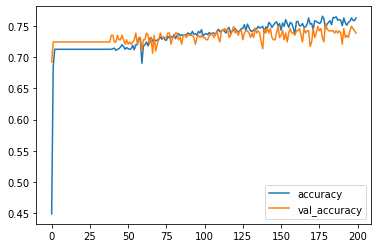

In [108]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')

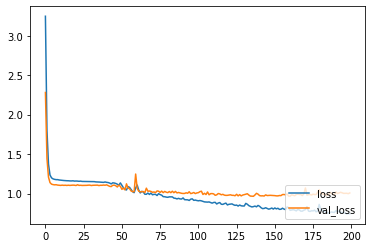

In [109]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc='lower right')

In [37]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([[2.8721311e-06, 8.8159234e-04, 7.9878055e-07, ..., 4.7793674e-07,
        6.1769265e-07, 8.2245842e-06],
       [3.5926125e-05, 1.6117811e-02, 1.2273658e-03, ..., 6.8090810e-07,
        3.1833579e-07, 3.4675270e-03],
       [7.0419878e-06, 3.2684298e-03, 3.8720427e-06, ..., 9.4257427e-07,
        4.9799945e-07, 2.3770497e-05],
       ...,
       [7.3333267e-06, 9.4855286e-04, 9.8435237e-07, ..., 6.9649229e-07,
        9.9143153e-07, 7.9398715e-06],
       [3.3345154e-06, 3.8634434e-02, 2.8258230e-04, ..., 1.9638981e-06,
        3.2772803e-07, 4.7435714e-03],
       [9.4505276e-06, 3.8117208e-03, 3.4671655e-06, ..., 4.6258637e-07,
        2.5469913e-07, 3.5043486e-05]], dtype=float32)

In [44]:
y_pred_ = np.argmax(y_pred, axis = 1)

In [45]:
y_pred_

array([ 3,  3,  3,  3,  3,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  4,  3,  3,  4,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  4,  3,  4,  3,
        3,  3,  2,  3,  3,  3,  3,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,
        2,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 17,  3,
        3,  3,  4,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 24,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 24,  3,  3,
        3,  3,  3,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  4,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  3,  3,  4,  3,  3,  3,  3,  3,  4,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [41]:
y_test_ = np.argmax(y_test, axis = 1)

In [42]:
y_test_

array([ 3,  4,  3,  3,  3,  3, 42,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  3,  6,  3,  3,  3,  3,  3, 19,  4, 19,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  3,  3,  3,  3,  4,  3,
        3,  3, 13,  3,  3,  3, 16, 20,  4,  1,  4,  3,  4,  3,  3,  4, 19,
        1,  3, 10,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3, 17,  3,
        3,  3, 24,  3,  3,  5,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 24,  3,  3,  4,  3,  3,  3,  3,  1,  3,  6,  3,
        4,  3,  3,  3,  3,  3,  3,  3,  3,  1,  4,  3,  1,  3,  1,  3,  8,
        4,  3,  3,  3,  4,  3,  4,  3,  3, 24,  4,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  8,  3,  3, 19,  3,  3,  4,  3,  3,  3,  3,  4,  3,  3,
        2,  3,  4,  3,  3,  3,  3,  3, 23,  3,  3,  3,  3,  3, 40,  3,  4,
        3, 20,  3,  3, 16,  3,  3,  3,  3,  3,  4,  3,  3,  3,  1,  3,  3,
       18,  3,  3,  3,  3

In [110]:
print(accuracy_score(y_pred_, y_test_))

0.8297161936560935


## 2. Stacked Vanilla RNN
- RNN layers can be stacked to form a deeper network

<img src="https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO" style="width: 500px"/>

In [111]:
def stacked_vanilla_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    model.add(SimpleRNN(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [112]:
model = stacked_vanilla_rnn()

In [113]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 50, verbose = 1, validation_split=0.2)

Epoch 1/200
23/23 [==============================] - 3s 47ms/step - loss: 2.1923 - accuracy: 0.5905 - val_loss: 1.2743 - val_accuracy: 0.7240
Epoch 2/200
23/23 [==============================] - 1s 27ms/step - loss: 1.2647 - accuracy: 0.7124 - val_loss: 1.1501 - val_accuracy: 0.7240
Epoch 3/200
23/23 [==============================] - 1s 25ms/step - loss: 1.2011 - accuracy: 0.7124 - val_loss: 1.1221 - val_accuracy: 0.7240
Epoch 4/200
23/23 [==============================] - 1s 26ms/step - loss: 1.1797 - accuracy: 0.7124 - val_loss: 1.1088 - val_accuracy: 0.7240
Epoch 5/200
23/23 [==============================] - 1s 27ms/step - loss: 1.1626 - accuracy: 0.7124 - val_loss: 1.0924 - val_accuracy: 0.7240
Epoch 6/200
23/23 [==============================] - 1s 26ms/step - loss: 1.1430 - accuracy: 0.7124 - val_loss: 1.0673 - val_accuracy: 0.7240
Epoch 7/200
23/23 [==============================] - 1s 29ms/step - loss: 1.1239 - accuracy: 0.7124 - val_loss: 1.0537 - val_accuracy: 0.7240
Epoch 

23/23 [==============================] - 1s 27ms/step - loss: 0.8628 - accuracy: 0.7339 - val_loss: 0.9678 - val_accuracy: 0.7348
Epoch 59/200
23/23 [==============================] - 1s 26ms/step - loss: 0.8541 - accuracy: 0.7357 - val_loss: 0.9798 - val_accuracy: 0.7348
Epoch 60/200
23/23 [==============================] - 1s 28ms/step - loss: 0.8458 - accuracy: 0.7437 - val_loss: 0.9665 - val_accuracy: 0.7348
Epoch 61/200
23/23 [==============================] - 1s 27ms/step - loss: 0.8471 - accuracy: 0.7473 - val_loss: 0.9706 - val_accuracy: 0.7312
Epoch 62/200
23/23 [==============================] - 1s 26ms/step - loss: 0.8447 - accuracy: 0.7348 - val_loss: 0.9716 - val_accuracy: 0.7384
Epoch 63/200
23/23 [==============================] - 1s 26ms/step - loss: 0.8403 - accuracy: 0.7491 - val_loss: 0.9724 - val_accuracy: 0.7348
Epoch 64/200
23/23 [==============================] - 1s 27ms/step - loss: 0.8569 - accuracy: 0.7464 - val_loss: 1.0245 - val_accuracy: 0.7204
Epoch 65/200

23/23 [==============================] - 1s 26ms/step - loss: 0.6484 - accuracy: 0.7760 - val_loss: 1.0354 - val_accuracy: 0.7419
Epoch 116/200
23/23 [==============================] - 1s 24ms/step - loss: 0.6256 - accuracy: 0.7849 - val_loss: 1.0483 - val_accuracy: 0.7419
Epoch 117/200
23/23 [==============================] - 1s 25ms/step - loss: 0.6099 - accuracy: 0.7894 - val_loss: 1.0669 - val_accuracy: 0.7348
Epoch 118/200
23/23 [==============================] - 1s 26ms/step - loss: 0.6047 - accuracy: 0.7966 - val_loss: 1.0516 - val_accuracy: 0.7276
Epoch 119/200
23/23 [==============================] - 1s 27ms/step - loss: 0.5978 - accuracy: 0.8002 - val_loss: 1.0546 - val_accuracy: 0.7312
Epoch 120/200
23/23 [==============================] - 1s 26ms/step - loss: 0.5851 - accuracy: 0.7975 - val_loss: 1.0648 - val_accuracy: 0.7312
Epoch 121/200
23/23 [==============================] - 1s 25ms/step - loss: 0.5918 - accuracy: 0.8011 - val_loss: 1.0701 - val_accuracy: 0.7384
Epoch 

Epoch 172/200
23/23 [==============================] - 1s 27ms/step - loss: 0.4190 - accuracy: 0.8548 - val_loss: 1.2278 - val_accuracy: 0.7348
Epoch 173/200
23/23 [==============================] - 1s 26ms/step - loss: 0.4206 - accuracy: 0.8468 - val_loss: 1.2211 - val_accuracy: 0.7168
Epoch 174/200
23/23 [==============================] - 1s 26ms/step - loss: 0.4409 - accuracy: 0.8486 - val_loss: 1.2434 - val_accuracy: 0.7204
Epoch 175/200
23/23 [==============================] - 1s 25ms/step - loss: 0.4469 - accuracy: 0.8477 - val_loss: 1.2474 - val_accuracy: 0.7168
Epoch 176/200
23/23 [==============================] - 1s 25ms/step - loss: 0.4410 - accuracy: 0.8369 - val_loss: 1.2302 - val_accuracy: 0.7168
Epoch 177/200
23/23 [==============================] - 1s 25ms/step - loss: 0.4138 - accuracy: 0.8575 - val_loss: 1.2243 - val_accuracy: 0.7348
Epoch 178/200
23/23 [==============================] - 1s 27ms/step - loss: 0.3992 - accuracy: 0.8665 - val_loss: 1.2705 - val_accuracy:

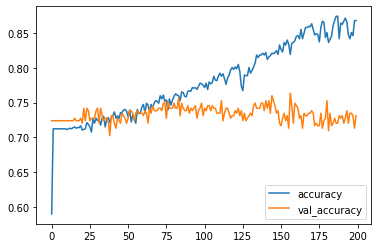

In [114]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')

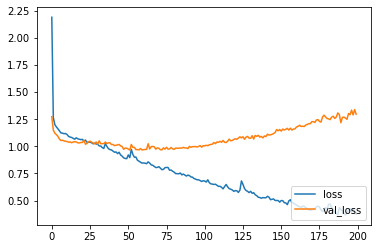

In [115]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc='lower right')

In [116]:
y_pred = model.predict(X_test)

In [117]:
y_pred_ = np.argmax(y_pred, axis = 1)

In [118]:
y_test_ = np.argmax(y_test, axis = 1)

In [119]:
print(accuracy_score(y_pred_, y_test_))

0.7312186978297162


## 3. LSTM
- LSTM (long short-term memory) is an improved structure to solve the problem of long-term dependencies

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 600px"/>

In [120]:
from tensorflow.keras.layers import LSTM

In [121]:
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [122]:
model = lstm()

In [123]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 50, verbose = 1, validation_split=0.2)

Epoch 1/200
23/23 [==============================] - 4s 66ms/step - loss: 3.1221 - accuracy: 0.6559 - val_loss: 1.7158 - val_accuracy: 0.7240
Epoch 2/200
23/23 [==============================] - 1s 36ms/step - loss: 1.4323 - accuracy: 0.7124 - val_loss: 1.1943 - val_accuracy: 0.7240
Epoch 3/200
23/23 [==============================] - 1s 35ms/step - loss: 1.2283 - accuracy: 0.7124 - val_loss: 1.1275 - val_accuracy: 0.7240
Epoch 4/200
23/23 [==============================] - 1s 35ms/step - loss: 1.1870 - accuracy: 0.7124 - val_loss: 1.0965 - val_accuracy: 0.7240
Epoch 5/200
23/23 [==============================] - 1s 35ms/step - loss: 1.1562 - accuracy: 0.7124 - val_loss: 1.0634 - val_accuracy: 0.7240
Epoch 6/200
23/23 [==============================] - 1s 35ms/step - loss: 1.1032 - accuracy: 0.7124 - val_loss: 1.0013 - val_accuracy: 0.7240
Epoch 7/200
23/23 [==============================] - 1s 36ms/step - loss: 1.0414 - accuracy: 0.7124 - val_loss: 0.9472 - val_accuracy: 0.7240
Epoch 

23/23 [==============================] - 1s 37ms/step - loss: 0.6478 - accuracy: 0.8297 - val_loss: 0.6915 - val_accuracy: 0.8530
Epoch 59/200
23/23 [==============================] - 1s 36ms/step - loss: 0.6475 - accuracy: 0.8297 - val_loss: 0.6827 - val_accuracy: 0.8495
Epoch 60/200
23/23 [==============================] - 1s 37ms/step - loss: 0.6428 - accuracy: 0.8342 - val_loss: 0.6839 - val_accuracy: 0.8495
Epoch 61/200
23/23 [==============================] - 1s 36ms/step - loss: 0.6589 - accuracy: 0.8342 - val_loss: 0.6809 - val_accuracy: 0.8423
Epoch 62/200
23/23 [==============================] - 1s 37ms/step - loss: 0.6341 - accuracy: 0.8369 - val_loss: 0.6823 - val_accuracy: 0.8530
Epoch 63/200
23/23 [==============================] - 1s 36ms/step - loss: 0.6330 - accuracy: 0.8378 - val_loss: 0.6837 - val_accuracy: 0.8459
Epoch 64/200
23/23 [==============================] - 1s 37ms/step - loss: 0.6354 - accuracy: 0.8360 - val_loss: 0.6785 - val_accuracy: 0.8351
Epoch 65/200

23/23 [==============================] - 1s 34ms/step - loss: 0.5396 - accuracy: 0.8504 - val_loss: 0.6249 - val_accuracy: 0.8674
Epoch 116/200
23/23 [==============================] - 1s 36ms/step - loss: 0.5119 - accuracy: 0.8548 - val_loss: 0.5983 - val_accuracy: 0.8710
Epoch 117/200
23/23 [==============================] - 1s 36ms/step - loss: 0.5833 - accuracy: 0.8495 - val_loss: 0.6401 - val_accuracy: 0.8602
Epoch 118/200
23/23 [==============================] - 1s 35ms/step - loss: 0.5235 - accuracy: 0.8611 - val_loss: 0.6135 - val_accuracy: 0.8602
Epoch 119/200
23/23 [==============================] - 1s 36ms/step - loss: 0.4981 - accuracy: 0.8611 - val_loss: 0.6023 - val_accuracy: 0.8781
Epoch 120/200
23/23 [==============================] - 1s 35ms/step - loss: 0.4903 - accuracy: 0.8701 - val_loss: 0.6317 - val_accuracy: 0.8566
Epoch 121/200
23/23 [==============================] - 1s 35ms/step - loss: 0.5141 - accuracy: 0.8602 - val_loss: 0.6176 - val_accuracy: 0.8746
Epoch 

Epoch 172/200
23/23 [==============================] - 1s 35ms/step - loss: 0.3577 - accuracy: 0.8925 - val_loss: 0.5627 - val_accuracy: 0.8781
Epoch 173/200
23/23 [==============================] - 1s 36ms/step - loss: 0.3422 - accuracy: 0.8996 - val_loss: 0.5713 - val_accuracy: 0.8853
Epoch 174/200
23/23 [==============================] - 1s 37ms/step - loss: 0.3385 - accuracy: 0.9032 - val_loss: 0.5507 - val_accuracy: 0.8889
Epoch 175/200
23/23 [==============================] - 1s 35ms/step - loss: 0.3783 - accuracy: 0.8880 - val_loss: 0.5882 - val_accuracy: 0.8710
Epoch 176/200
23/23 [==============================] - 1s 35ms/step - loss: 0.3553 - accuracy: 0.8934 - val_loss: 0.5654 - val_accuracy: 0.8781
Epoch 177/200
23/23 [==============================] - 1s 35ms/step - loss: 0.3358 - accuracy: 0.8996 - val_loss: 0.5641 - val_accuracy: 0.8817
Epoch 178/200
23/23 [==============================] - 1s 36ms/step - loss: 0.3271 - accuracy: 0.9086 - val_loss: 0.5595 - val_accuracy:

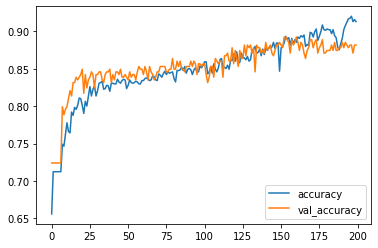

In [124]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')

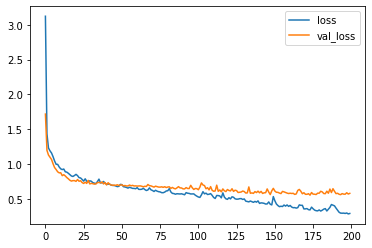

In [127]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc='upper right')

In [128]:
y_pred = model.predict(X_test)

In [129]:
y_pred_ = np.argmax(y_pred, axis = 1)

In [130]:
# accuracy improves by adopting LSTM structure
print(accuracy_score(y_pred_, y_test_))

0.8380634390651085


## 4. Stacked LSTM
- LSTM layers can be stacked as well

In [131]:
def stacked_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = True))
    model.add(LSTM(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [132]:
model = stacked_lstm()

In [133]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 50, verbose = 1, validation_split=0.2)

Epoch 1/200
23/23 [==============================] - 8s 122ms/step - loss: 2.5908 - accuracy: 0.6532 - val_loss: 1.2876 - val_accuracy: 0.7240
Epoch 2/200
23/23 [==============================] - 2s 71ms/step - loss: 1.2434 - accuracy: 0.7124 - val_loss: 1.1074 - val_accuracy: 0.7240
Epoch 3/200
23/23 [==============================] - 2s 70ms/step - loss: 1.1631 - accuracy: 0.7124 - val_loss: 1.0883 - val_accuracy: 0.7240
Epoch 4/200
23/23 [==============================] - 2s 71ms/step - loss: 1.1547 - accuracy: 0.7124 - val_loss: 1.1144 - val_accuracy: 0.7240
Epoch 5/200
23/23 [==============================] - 2s 70ms/step - loss: 1.1486 - accuracy: 0.7124 - val_loss: 1.0522 - val_accuracy: 0.7240
Epoch 6/200
23/23 [==============================] - 2s 74ms/step - loss: 1.1185 - accuracy: 0.7124 - val_loss: 1.0419 - val_accuracy: 0.7240
Epoch 7/200
23/23 [==============================] - 2s 70ms/step - loss: 1.1133 - accuracy: 0.7124 - val_loss: 1.0415 - val_accuracy: 0.7240
Epoch

23/23 [==============================] - 2s 71ms/step - loss: 0.7194 - accuracy: 0.8217 - val_loss: 0.6889 - val_accuracy: 0.8459
Epoch 59/200
23/23 [==============================] - 2s 72ms/step - loss: 0.6769 - accuracy: 0.8297 - val_loss: 0.6966 - val_accuracy: 0.8423
Epoch 60/200
23/23 [==============================] - 2s 72ms/step - loss: 0.6681 - accuracy: 0.8342 - val_loss: 0.6863 - val_accuracy: 0.8387
Epoch 61/200
23/23 [==============================] - 2s 72ms/step - loss: 0.6652 - accuracy: 0.8351 - val_loss: 0.7094 - val_accuracy: 0.8387
Epoch 62/200
23/23 [==============================] - 2s 71ms/step - loss: 0.6711 - accuracy: 0.8289 - val_loss: 0.7161 - val_accuracy: 0.8423
Epoch 63/200
23/23 [==============================] - 2s 73ms/step - loss: 0.6614 - accuracy: 0.8306 - val_loss: 0.6862 - val_accuracy: 0.8387
Epoch 64/200
23/23 [==============================] - 2s 74ms/step - loss: 0.6756 - accuracy: 0.8342 - val_loss: 0.6813 - val_accuracy: 0.8459
Epoch 65/200

23/23 [==============================] - 2s 74ms/step - loss: 0.5008 - accuracy: 0.8575 - val_loss: 0.6578 - val_accuracy: 0.8530
Epoch 116/200
23/23 [==============================] - 2s 72ms/step - loss: 0.5423 - accuracy: 0.8504 - val_loss: 0.6380 - val_accuracy: 0.8566
Epoch 117/200
23/23 [==============================] - 2s 73ms/step - loss: 0.5045 - accuracy: 0.8557 - val_loss: 0.6390 - val_accuracy: 0.8566
Epoch 118/200
23/23 [==============================] - 2s 73ms/step - loss: 0.5249 - accuracy: 0.8539 - val_loss: 0.6280 - val_accuracy: 0.8710
Epoch 119/200
23/23 [==============================] - 2s 73ms/step - loss: 0.4950 - accuracy: 0.8611 - val_loss: 0.6162 - val_accuracy: 0.8566
Epoch 120/200
23/23 [==============================] - 2s 72ms/step - loss: 0.4888 - accuracy: 0.8647 - val_loss: 0.6099 - val_accuracy: 0.8566
Epoch 121/200
23/23 [==============================] - 2s 70ms/step - loss: 0.5042 - accuracy: 0.8575 - val_loss: 0.6459 - val_accuracy: 0.8459
Epoch 

Epoch 172/200
23/23 [==============================] - 2s 76ms/step - loss: 0.2973 - accuracy: 0.9167 - val_loss: 0.6138 - val_accuracy: 0.8638
Epoch 173/200
23/23 [==============================] - 2s 77ms/step - loss: 0.2906 - accuracy: 0.9203 - val_loss: 0.6140 - val_accuracy: 0.8602
Epoch 174/200
23/23 [==============================] - 2s 77ms/step - loss: 0.2976 - accuracy: 0.9158 - val_loss: 0.6337 - val_accuracy: 0.8746
Epoch 175/200
23/23 [==============================] - 2s 75ms/step - loss: 0.3064 - accuracy: 0.9158 - val_loss: 0.6137 - val_accuracy: 0.8746
Epoch 176/200
23/23 [==============================] - 2s 77ms/step - loss: 0.3021 - accuracy: 0.9211 - val_loss: 0.6477 - val_accuracy: 0.8602
Epoch 177/200
23/23 [==============================] - 2s 78ms/step - loss: 0.3127 - accuracy: 0.9113 - val_loss: 0.6276 - val_accuracy: 0.8674
Epoch 178/200
23/23 [==============================] - 2s 77ms/step - loss: 0.2871 - accuracy: 0.9211 - val_loss: 0.6280 - val_accuracy:

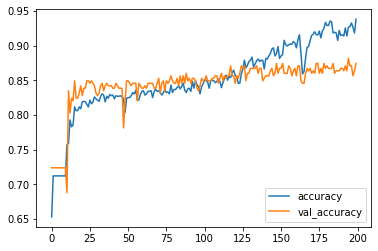

In [134]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc='lower right')

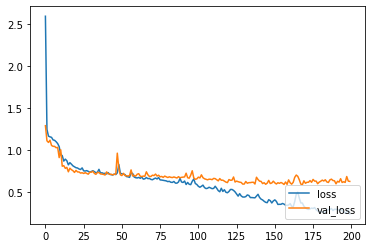

In [135]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend(loc='lower right')

In [136]:
y_pred = model.predict(X_test)

In [137]:
y_pred_ = np.argmax(y_pred, axis = 1)

In [138]:
print(accuracy_score(y_pred_, y_test_))

0.8480801335559266
